In [1]:
import sys
# sys.path.append('/home/juju/projects/bbo')
sys.path

['/home/juju/projects/bbo',
 '/home/juju/miniconda3/envs/bbo/lib/python310.zip',
 '/home/juju/miniconda3/envs/bbo/lib/python3.10',
 '/home/juju/miniconda3/envs/bbo/lib/python3.10/lib-dynload',
 '',
 '/home/juju/.local/lib/python3.10/site-packages',
 '/home/juju/miniconda3/envs/bbo/lib/python3.10/site-packages']

In [2]:
print(sys.executable)

/home/juju/miniconda3/envs/bbo/bin/python


In [3]:
%matplotlib inline

import os
import warnings
import sys
import time
from typing import Any
import time
import copy
import random
from dataclasses import dataclass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import clear_output
from IPython.core.debugger import set_trace
import glob
def add(path):
    if path not in sys.path:
        sys.path.append(path)
add("/home/juju/projects/bbo")
import analysis.utils as nbu


%load_ext autoreload
%autoreload 1
%aimport analysis.utils

In [4]:
!sh bat_juju.sh 

Start f:branin-2d random
Finish
Start f:branin-2d sobol
Finish


In [8]:
def plot_result(fn, color="#AAAAAA"):
    o = nbu.loadKV(fn,
                  ["i_sample", "return"],
                  grep_for="TRACE:"
                 )
    traces = []
    n_x = None
    for i_sample in np.unique(o['i_sample']):
        i = np.where(o['i_sample'] == i_sample)[0]
        x = list(o['return'][i])
        if n_x is not None:
            while len(x) < n_x:
                x.append(x[-1])
        n_x = len(x)
        traces.append(x)
    traces = np.array(traces)
#     print(traces)
    print (len(traces), fn)
    nbu.filled_err(traces, fmt='-', color=color, se=True)

In [9]:
def plot_results(exp_tag, problem_name, ttypes=None):
    ddir = f"/home/juju/projects/bbo/results/{exp_tag}/{problem_name}/"    
    colors = ["blue", "green", "red", "black", "cyan", "magenta"]
    legend = []
    i_color = 0
    if not ttypes:
        ttypes = glob.glob(f"{ddir}/*")
    for ttype in ttypes:
        ttype = ttype.split("/")[-1]
        if ttype in ["dumb", "rs"]:
            continue
        try:
            plot_result(f"{ddir}/{ttype}", color=colors[i_color])
            legend.extend( [ttype, '_'] )
            i_color += 1
        except FileNotFoundError:
            pass
        except Exception as e:
            print (f"Error in {ttype} {e}")
        if i_color == len(colors):
            i_color = 0


    warnings.simplefilter("ignore")
    with warnings.catch_warnings():
        plt.legend(legend, loc='lower right');
    plt.xlabel('episodes')
    plt.ylabel('return')
    plt.title(f'{problem_name}')
    plt.savefig('figures/'+f'{problem_name}'+'.png')

30 /home/juju/projects/bbo/results/exp_test/branin_2d//sobol
30 /home/juju/projects/bbo/results/exp_test/branin_2d//random


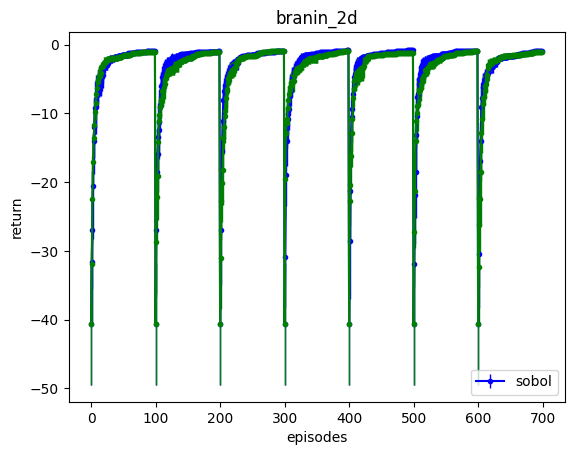

In [10]:
plot_results("exp_test","branin_2d")